<a href="https://colab.research.google.com/github/VekhovIO/StatPrac/blob/main/project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/diabetes.csv') #подключили датасет через гугл диск
##df = pd.read_csv('datasets/diabetes.csv', low_memory=False)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Датасет содержит информацию о пациентах, включая различные медицинские показатели, такие как месяц беременности (Pregnancies), уровень глюкозы в крови (Glucose), артериальное давление (BloodPressure), толщина кожи (SkinThickness), уровень инсулина в крови (Insulin), индекс массы тела (BMI), семейная предрасположенность к диабету (DiabetesPedigreeFunction), возраст (Age) и наличие диабета (Outcome).

In [7]:
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns

data = df.loc[~df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].isna().any(axis=1)]

teachdata = df.loc[~df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].isna().any(axis=1)]

teachdata.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


##Первичные наблюдения из средних значений:
1)Уровень глюкозы в крови диабетиков сильно выше, чем у здоровых людей

2)Беременность довольно сильно повышает риск появления диабета

3)С возрастом вероятность заболеть диабетом растет

4)Чем больше вес человека, тем больше риск заболеть диабетом

5)Так называемая DPF, отвечающая за генетическую предрасположенность способна предсказать риск заболеть диабетом, но не является точным индикатором

<ipython-input-8-b1fc29b3b2df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=teachdata, palette = 'hls')


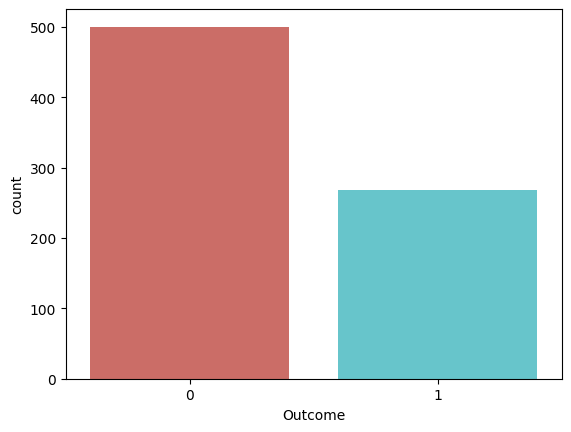

In [8]:
outc = teachdata['Outcome'].value_counts()
sns.countplot(x='Outcome', data=teachdata, palette = 'hls')
plt.show()

Классы здоровых и болеющих диабетом людей отличаются в 2 раза, что не критично.
Можно считать классы сбалансированными(потом проверим это ещё раз и подтвердим).

<Axes: ylabel='Density'>

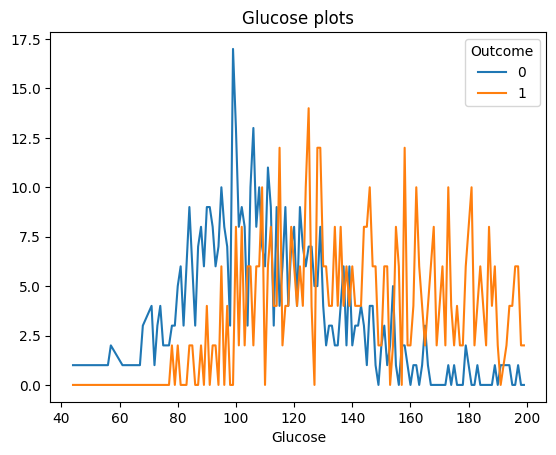

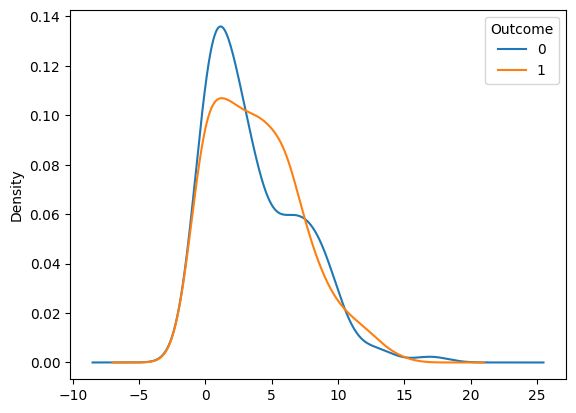

In [9]:
outcome_0_data = teachdata[teachdata['Outcome'] == 1].copy()

teachdata_1 = pd.concat([teachdata, outcome_0_data], ignore_index=True)

pd.crosstab(teachdata_1.loc[teachdata_1.Glucose > 0].Glucose,teachdata_1.Outcome).plot(title="Glucose plots")
pd.crosstab(teachdata_1.loc[teachdata_1.Glucose > 0].Glucose,teachdata_1.Outcome).plot.density()

Первый график, показывает количество пациентов с диабетом и без диабета в зависимости от уровня глюкозы в крови.

Второй график показывает плотность распределения уровня глюкозы в крови для пациентов с диабетом и без него.

<Axes: ylabel='Density'>

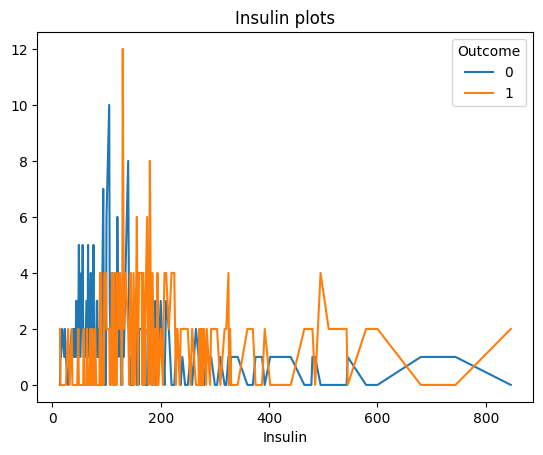

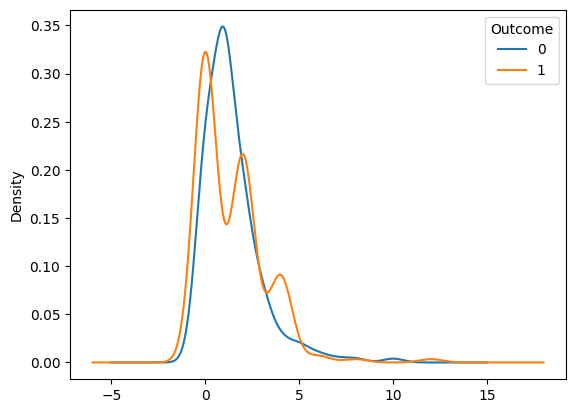

In [10]:
dat = teachdata_1.loc[teachdata_1.Insulin > 0]
pd.crosstab(dat.Insulin,dat.Outcome).plot(title="Insulin plots")
pd.crosstab(dat.Insulin,dat.Outcome).plot.density()

Первый график, показывает количество пациентов с диабетом и без диабета в зависимости от уровня инсулина.

Второй график показывает плотность распределения уровня инсулина для пациентов с диабетом и без него.

<Axes: ylabel='Density'>

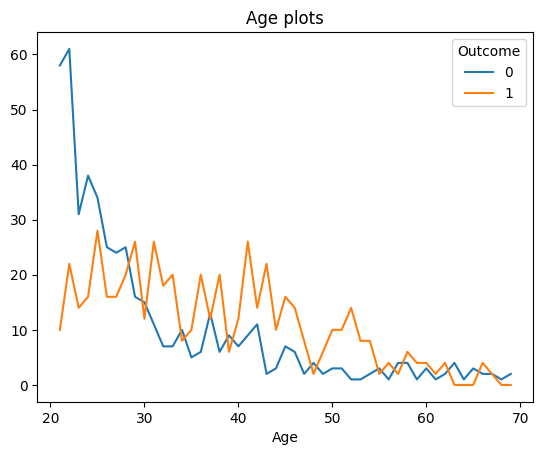

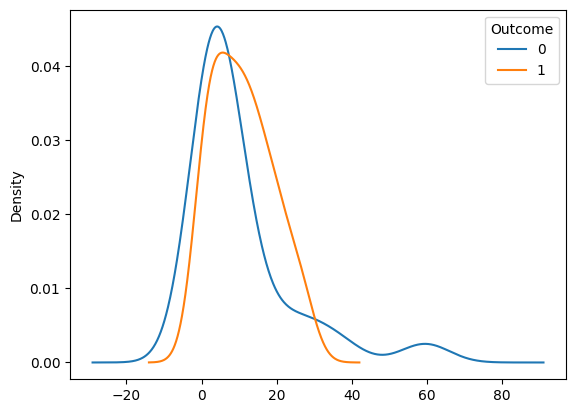

In [11]:
pd.crosstab(teachdata_1.loc[teachdata_1.Age < 70].Age, teachdata_1.Outcome).plot(title="Age plots")
pd.crosstab(teachdata_1.loc[teachdata_1.Age < 70].Age, teachdata_1.Outcome).plot.density()

Первый график, показывает количество пациентов с диабетом и без диабета в зависимости от возраста.

Второй график показывает плотность распределения возраста пациентов с диабетом и без него.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = teachdata.drop('Outcome', axis=1)
y = teachdata['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle = True)

model = LogisticRegression(max_iter = 100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7291666666666666
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       123
           1       0.62      0.65      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192

Confusion Matrix:
[[95 28]
 [24 45]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
X = teachdata.drop('Outcome', axis=1)
cols = ['Pregnancies', 'Glucose', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X = X[cols]
y = teachdata['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7291666666666666
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       123
           1       0.63      0.61      0.62        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192

Confusion Matrix:
[[98 25]
 [27 42]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Модель демонстрирует приемлемую, но не идеальную производительность. Она имеет некоторую способность различать образцы класса 0 и класса 1, но существует пространство для улучшений. Возможно, оптимизация гиперпараметров модели может улучшить ее производительность.

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'penalty': ['l1', 'l2'],  # Тип регуляризации
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Обратная сила регуляризации
    'solver': ['liblinear'],  # Алгоритм оптимизации
    'class_weight': [None, 'balanced']  # Балансировка классов
}

model = LogisticRegression()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))


Best Parameters: {'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.7725187406296852
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       123
           1       0.62      0.59      0.61        69

    accuracy                           0.72       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.72      0.72      0.72       192



С помощью gridsearch удалось добиться значительного улучшения параметра accuracy, почти до 78%. Однако, precision и recall для класса 1 остались примерно на том же уровне

##Протестируем метод catboost и попробуем улучшить нашу модель

In [3]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.4 MB/s eta 0:00:00


In [4]:
from google.colab import output
output.enable_custom_widget_manager()

In [15]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = teachdata.drop('Outcome', axis=1)
y = teachdata['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

params = {"iterations": 500,
          "depth":5,
          "loss_function": "Logloss",
          "verbose": False}
          #"learning_rate": 0.001}

model = CatBoostClassifier(**params)
model.fit(X_train, y_train, plot=True, eval_set=(X_test, y_test))

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Accuracy: 0.7604166666666666
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       123
           1       0.68      0.64      0.66        69

    accuracy                           0.76       192
   macro avg       0.74      0.73      0.74       192
weighted avg       0.76      0.76      0.76       192

Confusion Matrix:
[[102  21]
 [ 25  44]]


Как мы видим, показатели precision и recall выросли для обоих классов. Accuracy упало до 76%, но все же это выше чем у 1й модели (72%). Поэтому этот алгоритм является наиболее оптимальным

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': [100, 500, 1000],
    'depth': [3, 5, 7],
    #'learning_rate': [0.01, 0.1, 0.5],
}

base_model = CatBoostClassifier()

grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Выходные данные были обрезаны до нескольких последних строк (5000).
32:	learn: 0.4762503	total: 67.1ms	remaining: 136ms
33:	learn: 0.4718700	total: 69.9ms	remaining: 136ms
34:	learn: 0.4690778	total: 71.6ms	remaining: 133ms
35:	learn: 0.4658053	total: 73.3ms	remaining: 130ms
36:	learn: 0.4623934	total: 75.1ms	remaining: 128ms
37:	learn: 0.4596061	total: 77ms	remaining: 126ms
38:	learn: 0.4568710	total: 78.9ms	remaining: 123ms
39:	learn: 0.4537602	total: 80.7ms	remaining: 121ms
40:	learn: 0.4507805	total: 82.6ms	remaining: 119ms
41:	learn: 0.4480480	total: 84.4ms	remaining: 117ms
42:	learn: 0.4447385	total: 86.1ms	remaining: 114ms
43:	learn: 0.4420827	total: 88.1ms	remaining: 112ms
44:	learn: 0.4396754	total: 89.9ms	remaining: 110ms
45:	learn: 0.4375124	total: 91.7ms	remaining: 108ms
46:	learn: 0.4357609	total: 93.6ms	remaining: 106ms
47:	learn: 0.4332482	total: 95.4ms	remaining: 103ms
48:	learn: 0.4309144	total: 97.1ms	remaining: 101ms
49:	learn: 0.4283171	total: 98.6ms	remaining: 98.6

Построим ROC кривую нашей модели, чтобы визуально оценить ее производительность

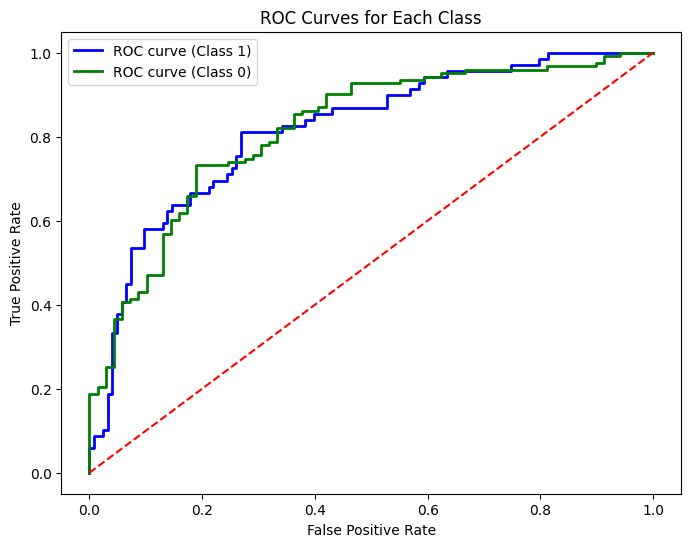

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[:, 1]

positive_class_index = 1
negative_class_index = 0

fpr_pos, tpr_pos, thresholds_pos = roc_curve(y_test, y_pred_proba, pos_label=positive_class_index)
fpr_neg, tpr_neg, thresholds_neg = roc_curve(y_test, 1 - y_pred_proba, pos_label=negative_class_index)

plt.figure(figsize=(8, 6))
plt.plot(fpr_pos, tpr_pos, color='blue', lw=2, label='ROC curve (Class 1)')
plt.plot(fpr_neg, tpr_neg, color='green', lw=2, label='ROC curve (Class 0)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.show()

##Исследование модели предсказания диабета позволяет сделать несколько ключевых выводов:

1. Производительность модели: Модель демонстрирует довольно неплохую производительность с точностью около 80%. Однако, есть некоторое количество ложных предсказаний.

2. Классификация: Модель способна правильно классифицировать большинство случаев, но имеет тенденцию совершать ошибки в предсказании положительных случаев (что не очень хорошо :) )